# S5 Logistic regression practice

In [2]:
import pandas
import numpy as np
from sklearn.datasets import load_wine
from sklearn.linear_model import LogisticRegression

In [8]:
data = load_wine()

X = data.data
Class0 = (data['target'] == 0).astype(int)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Class0, train_size=0.8, test_size=0.2)

In [12]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

/home/christian/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [13]:
y_pred = log_reg.predict(X_test)

Training error rate

In [20]:
log_reg.score(X_train, y_train)

0.9859154929577465

Confusion matrix:

In [14]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[23,  0],
       [ 2, 11]])

Test error rate

In [21]:
log_reg.score(X_test, y_test)

0.9444444444444444

Text(0, 0.5, 'TPR (recall)')

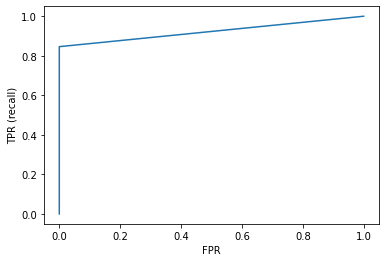

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

In [26]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, y_pred)
print("AUC score: {:.3f}".format(auc))

AUC score: 0.923


Cross validation

In [31]:
# stratified
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import StratifiedKFold 
kfold = StratifiedKFold(n_splits=3)
print("Cross-validation scores:\n{}".format( cross_val_score(log_reg, data.data, data.target, cv=kfold)))

Cross-validation scores:
[0.76666667 0.94915254 1.        ]


/home/christian/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/christian/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

## Softmax regression

In [35]:
softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X_train, y_train)

/home/christian/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=10, multi_class='multinomial')

In [36]:
y_pred_s = softmax_reg.predict(X_test)

Confusion matrix for the softmax regression

In [38]:
cnf_matrix_s = metrics.confusion_matrix(y_test, y_pred_s)
cnf_matrix_s

array([[22,  1],
       [ 1, 12]])

In [39]:
from sklearn.metrics import classification_report 
print(classification_report(y_test, y_pred_s))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        23
           1       0.92      0.92      0.92        13

    accuracy                           0.94        36
   macro avg       0.94      0.94      0.94        36
weighted avg       0.94      0.94      0.94        36



## Notes

Really I am not sure of what I've done above here is correct, especially the part of the cross validation.